In [22]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
email=pd.read_csv("C:/Users/dread-miles/Documents/Data Sets/udemy_data_sets/Project 6/emails.csv")
email.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [30]:
email.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [31]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


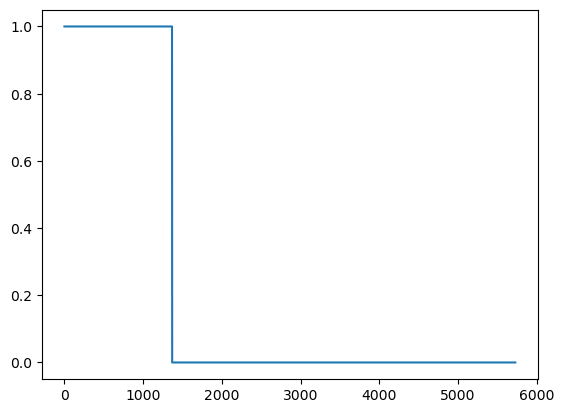

In [32]:
spam=email.spam
plt.plot(spam)

In [44]:
#lets be more specific
spam= email[email["spam"]==1]
ham= email[email["spam"]==0]

In [47]:
ham.head()

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0


In [48]:
spam.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [49]:
length_spam=(len(spam)/len(email))*100
length_ham=(len(ham)/len(email))*100

In [52]:
print(f"the percentage of spam is:{length_spam:.2f}% and the ham is {length_ham:.2f}%")

the percentage of spam is:23.88% and the ham is 76.12%


# lets vectorize the text

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

In [73]:
vectorizer=CountVectorizer()
email_vectorized=vectorizer.fit_transform(email["text"])

In [77]:
print(email_vectorized.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [87]:
email_vectorized.toarray().shape

(5728, 37303)

In [90]:
print(email_vectorized[1])

  (0, 32371)	1
  (0, 18848)	6
  (0, 33450)	1
  (0, 4836)	3
  (0, 7546)	3
  (0, 23937)	6
  (0, 23796)	3
  (0, 32131)	1
  (0, 34050)	1
  (0, 16440)	1
  (0, 14344)	1
  (0, 22235)	1
  (0, 23177)	1
  (0, 9149)	1
  (0, 5629)	1
  (0, 25558)	1
  (0, 20705)	3
  (0, 13671)	1
  (0, 25686)	1
  (0, 27802)	1
  (0, 30282)	1
  (0, 16321)	1
  (0, 34315)	3
  (0, 31199)	1
  (0, 19549)	1
  :	:
  (0, 11233)	1
  (0, 8891)	1
  (0, 16544)	1
  (0, 18053)	1
  (0, 21928)	1
  (0, 16974)	1
  (0, 12889)	1
  (0, 12586)	1
  (0, 29862)	1
  (0, 6850)	1
  (0, 12409)	1
  (0, 26081)	1
  (0, 25102)	1
  (0, 18204)	1
  (0, 17551)	1
  (0, 25573)	1
  (0, 6310)	1
  (0, 23283)	1
  (0, 5651)	1
  (0, 12764)	1
  (0, 8613)	1
  (0, 24583)	1
  (0, 26014)	1
  (0, 11613)	1
  (0, 4437)	1


# lets train our model

In [93]:
type(email)

pandas.core.frame.DataFrame

In [94]:
label=email["spam"].values

In [95]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier=MultinomialNB()
nb_classifier.fit(email_vectorized,label)

MultinomialNB()

### lets evaluate it on some dummy data

In [97]:
eval_example=["free money","hi there neba i want you to come to the office by 3 oclock tommorow"]
eval_example_vectorized=vectorizer.transform(eval_example)

In [100]:
result_of_example=nb_classifier.predict(eval_example_vectorized)
print(result_of_example)

[1 0]


# letrs train the model using train test split

In [104]:
from sklearn.model_selection import train_test_split
x=email_vectorized
y=label
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [105]:
naive_model=MultinomialNB()
naive_model.fit(x_train,y_train)

MultinomialNB()

In [110]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=naive_model.predict(x_test)
cm=confusion_matrix(y_pred,y_test)
cm

array([[1084,    4],
       [  11,  333]], dtype=int64)

<Axes: >

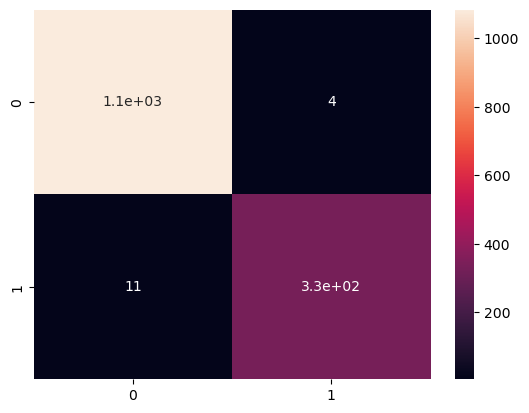

In [109]:
sns.heatmap(cm,annot=True)

In [111]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1088
           1       0.99      0.97      0.98       344

    accuracy                           0.99      1432
   macro avg       0.99      0.98      0.99      1432
weighted avg       0.99      0.99      0.99      1432



# lets do the TF-IDF

In [115]:
from sklearn.feature_extraction.text import TfidfTransformer
#lets initiate an object
email_tfidf=TfidfTransformer().fit_transform(email_vectorized)
print(email_tfidf)

  (0, 37024)	0.17208123052045946
  (0, 37011)	0.05951201367677841
  (0, 36633)	0.06362884622855916
  (0, 36499)	0.06222992923797418
  (0, 36497)	0.05496250469612607
  (0, 36487)	0.024535125774765083
  (0, 36373)	0.15859998538757752
  (0, 36080)	0.12151122716623192
  (0, 36019)	0.07752205141405537
  (0, 35085)	0.04819795247400036
  (0, 34849)	0.08642601017760695
  (0, 33798)	0.06937595206520696
  (0, 33616)	0.0505794374081432
  (0, 33605)	0.06374174384064075
  (0, 33557)	0.024363848252389356
  (0, 33450)	0.08879886351332181
  (0, 33441)	0.07832342193680951
  (0, 33068)	0.08740244440254487
  (0, 32876)	0.055936354136477726
  (0, 32650)	0.10271060345112362
  (0, 32635)	0.1101658233600441
  (0, 32371)	0.01586204753542999
  (0, 32352)	0.1101658233600441
  (0, 32296)	0.07271784497009995
  (0, 32001)	0.10914211026989358
  :	:
  (5727, 7585)	0.013599596715902367
  (5727, 7546)	0.018792979208173948
  (5727, 6317)	0.01979119939543908
  (5727, 5715)	0.5298189343950607
  (5727, 5615)	0.02294661803

In [116]:
x=email_tfidf
y=label

x_train,x_test,y_train,y_test=train_test_split(x,y)
model_3=MultinomialNB()
model_3.fit(x_train,y_train)

MultinomialNB()

In [119]:
y_pred_test=model_3.predict(x_test)
cm=confusion_matrix(y_pred_test,y_test)
cm

array([[1106,  161],
       [   1,  164]], dtype=int64)

<Axes: >

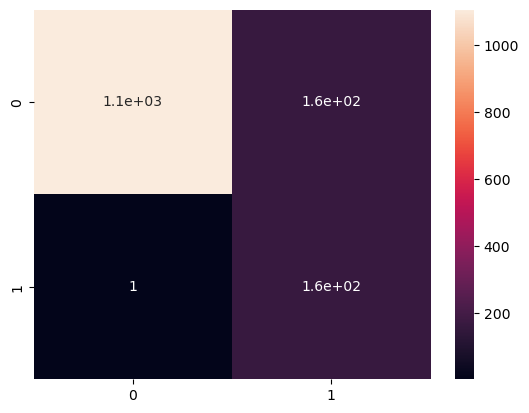

In [123]:
sns.heatmap(cm,annot=True)

# THE END 